In [1]:
import numpy as np
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
face = plt.imread('data/face2.jpg')
plane = plt.imread('data/lufthansa.jpg')

Size of image: (1024, 1024, 3)


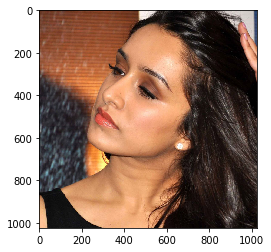

In [3]:
print('Size of image:', face.shape)
plt.imshow(face)

Size of image: (1024, 1024, 3)


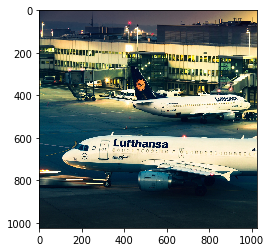

In [4]:
print('Size of image:', plane.shape)
plt.imshow(plane)

## Hide Image.

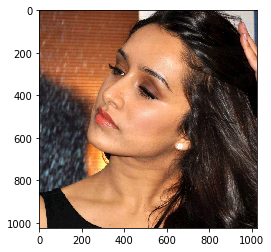

In [5]:
def hide_image(img1, img2=None, number_of_bits=3):
    """
    inputs:
        img1 -- image to be hidden or hidden image
        img2 -- image used for hiding
    output:
        out -- hidden image
    """
    if img2 is not None:
        assert img1.shape == img2.shape
        img2 = (np.floor(img2 / 2**number_of_bits) * 2**number_of_bits).astype(int)
        img1 = np.right_shift(img1, 8-number_of_bits)
        out = np.bitwise_or(img2, img1)
    else:
        tmp = np.left_shift(img1, 8-number_of_bits)
        out = (tmp - (np.floor(tmp / 256) * 256)).astype(int)
    
    return out

hidden = hide_image(plane, face)
plt.imshow(hidden)

## Retrieve Hidden Image.

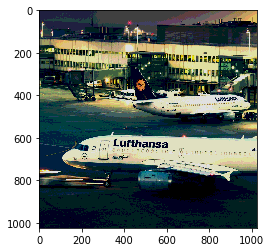

In [6]:
revealed = hide_image(hidden)
plt.imshow(revealed)

## Display Difference with Original Image.

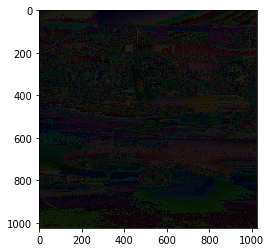

In [7]:
diff = np.abs(plane-revealed)
plt.imshow(diff)

## Compute Structural Similarity Index.

In [8]:
face_hidden = ssim(face, hidden, data_range=hidden.max() - hidden.min(), multichannel=True)
print('SSIM between target with and without hidden image:', face_hidden)
plane_revealed = ssim(plane, revealed, data_range=revealed.max() - revealed.min(), multichannel=True)
print('SSIM between original and retrieved image:', plane_revealed)

SSIM between target with and without hidden image: 0.942196198924
SSIM between original and retrieved image: 0.695978698301
